In [9]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.model_selection import GridSearchCV


In [12]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics.csv')


In [13]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,...,score,score_class,openai_obviousness,openai_compatibility,openai_symmetry,openai_comparison,minilm_obviousness,minilm_compatibility,minilm_symmetry,minilm_comparison
0,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...",...,3.0,1,0.327687,0.199261,0.128426,0.327687,0.062956,0.117572,-0.054616,0.343667
1,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...",...,52.0,2,0.460896,0.285568,0.175328,0.460896,0.264990,0.219114,0.045877,0.565330
2,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","[-0.030697468668222427, 0.0374496765434742, -0...","[-0.03980013728141785, 0.004972108174115419, 0...",...,0.0,0,0.416138,0.614947,-0.198809,0.416138,0.192917,0.318827,-0.125910,0.172808
3,How can you tell if someone got their dog from...,dont worry theyll let you know.,let,The term let means to allow or permit.,Please let me know if you have any questions ...,I hope they will let us know if the event is ...,"[-0.00539117306470871, 0.05857688933610916, 0....","[0.0022354505490511656, -0.04810196906328201, ...","[-0.06675653904676437, 0.04044463112950325, -0...","[0.04194096103310585, 0.04042356088757515, 0.0...",...,0.0,0,0.200622,0.467623,-0.267001,0.200622,0.025724,0.302534,-0.276810,0.217617
4,What is a mummies favorite genre of music?,wrap,wrap,The word wrap refers to a type of music genre...,The chef prepared a delicious wrap filled wit...,The film was a wrap for the director after an...,"[0.019643135368824005, -0.07043468952178955, -...","[-0.07856648415327072, 0.09697866439819336, -0...","[-0.07856648415327072, 0.09697866439819336, -0...","[-0.02716182731091976, 0.013567562215030193, -...",...,15.0,2,0.097818,0.303449,-0.205631,0.097818,0.083568,0.352182,-0.268614,0.135426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,What word becomes shorter when you add two let...,short.,short,Short can refer to a measurement of length.,The man wore a short coat on the chilly day.,The presentation was so short that it barely ...,"[0.05143871530890465, -0.05746700242161751, -0...","[0.024742819368839264, 0.0780433863401413, -0....","[0.0167688000947237, 0.1064821109175682, 0.019...","[0.050711680203676224, 0.09767840802669525, 0....",...,2.0,1,0.318003,0.470339,-0.152336,0.318003,0.151791,0.369197,-0.217405,0.471958
259,Why cant dinosaurs clap?,Because theyre dead.,dead,Dead means no longer alive. / Dead can refer ...,The tree was dead and needed to be cut down.,The battery was dead after months of use.,"[-0.0008477053488604724, -0.02535668946802616,...","[0.0455954372882843, -0.020797444507479668, 0....","[-0.055957771837711334, 0.005909096449613571, ...","[-0.038137197494506836, -0.050436947494745255,...",...,3.0,1,0.291353,0.317250,-0.025897,0.291353,0.189085,0.215201,-0.026115,0.374744
260,What breaks when u give it to a toddler?,her hips,hips,The word hips refers to the par

In [14]:
# Check the distribution of classes in y_train
class_counts = jokes['score_class'].value_counts()
print(class_counts)

score_class
1    105
2     81
0     63
3      8
4      6
Name: count, dtype: int64


### Remove classes 3 and 4

In [16]:
jokes = jokes.drop(jokes[jokes['score_class'].isin([3, 4])].index)


In [17]:
# Check the distribution of classes in y_train
class_counts = jokes['score_class'].value_counts()
print(class_counts)

score_class
1    105
2     81
0     63
Name: count, dtype: int64


In [18]:
def metrics (y_true, y_predicted):
    accuracy = accuracy_score(y_true, y_predicted)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_predicted, average='weighted')
    print("Précision: ", precision)
    recall = recall_score(y_true, y_predicted, average='weighted')
    print("Recall: ", recall)
    f1 = f1_score(y_true, y_predicted, average='weighted')
    print("F1-score: ", f1)
    conf_mat = confusion_matrix(y_true, y_predicted, normalize='all')
    print("Confusion Matrix:\n", conf_mat)


# ======
# MINILM
# ======

In [19]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score_class']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


# SVM

In [29]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.25125628140703515
Précision:  0.06312971894649125
Recall:  0.25125628140703515
F1-score:  0.1009061371112591
Confusion Matrix:
 [[0.25125628 0.         0.         ... 0.         0.         0.        ]
 [0.11557789 0.         0.         ... 0.         0.         0.        ]
 [0.06030151 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00502513 0.         0.         ... 0.         0.         0.        ]
 [0.00502513 0.         0.         ... 0.         0.         0.        ]
 [0.00502513 0.         0.         ... 0.         0.         0.        ]]

Accuracy:  0.26
Précision:  0.0676
Recall:  0.26
F1-score:  0.10730158730158729
Confusion Matrix:
 [[0.26 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.

/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.43103448275862066
Précision:  0.4165983251108941
Recall:  0.43103448275862066
F1-score:  0.41454191715850625
Confusion Matrix:
 [[0.09195402 0.09770115 0.06321839]
 [0.07471264 0.25862069 0.07471264]
 [0.07471264 0.18390805 0.08045977]]

Accuracy:  0.41333333333333333
Précision:  0.4004625439919557
Recall:  0.41333333333333333
F1-score:  0.40452874370682584
Confusion Matrix:
 [[0.09333333 0.10666667 0.05333333]
 [0.09333333 0.25333333 0.10666667]
 [0.06666667 0.16       0.06666667]]


# Random forest

Best parameters: {'max_depth': 2, 'min_samples_split': 70, 'n_estimators': 50}
Best cross-validated accuracy: 0.43092436974789916


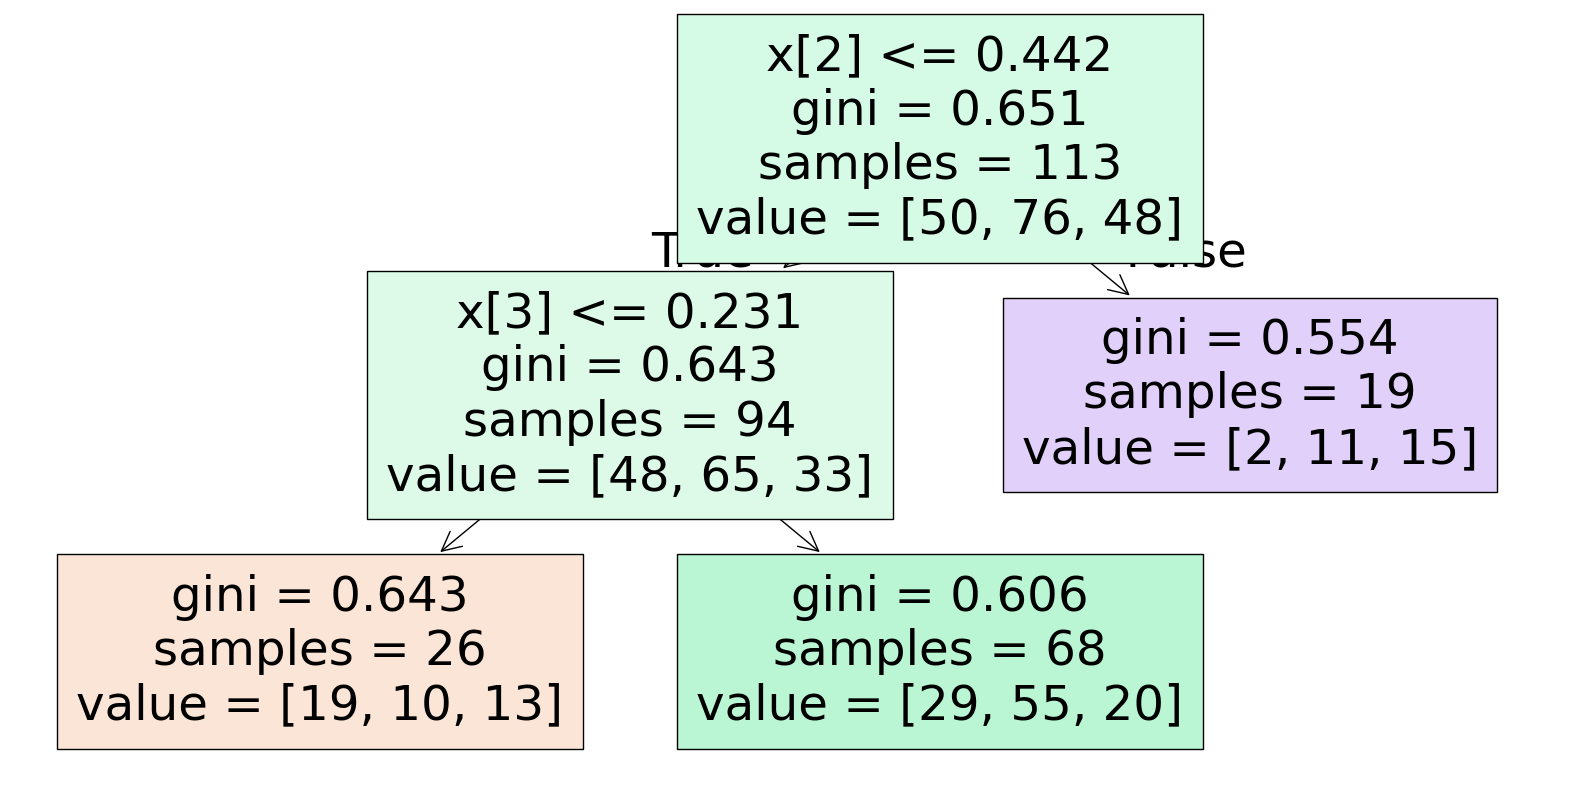

Accuracy:  0.4540229885057471
Précision:  0.35548949663099483
Recall:  0.4540229885057471
F1-score:  0.35740063469948524
Confusion Matrix:
 [[0.         0.21264368 0.04022989]
 [0.         0.36781609 0.04022989]
 [0.         0.25287356 0.0862069 ]]

Accuracy:  0.38666666666666666
Précision:  0.2696018735362998
Recall:  0.38666666666666666
F1-score:  0.3037816764132554
Confusion Matrix:
 [[0.         0.24       0.01333333]
 [0.         0.33333333 0.12      ]
 [0.         0.24       0.05333333]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [23]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ 1.44190821  3.62170282  5.06361103 -7.36933442]
Intercept: 12.467939630298439
Mean squared error: 488.40936984684345
R² score: -0.04680475589779465


# ======
# OPENAI
# ======

In [24]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score_class']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


# SVM

In [25]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.39655172413793105
Précision:  0.2967956210942768
Recall:  0.39655172413793105
F1-score:  0.33197894117434346
Confusion Matrix:
 [[0.         0.17241379 0.08045977]
 [0.01149425 0.28735632 0.1091954 ]
 [0.01149425 0.2183908  0.1091954 ]]

Accuracy:  0.38666666666666666
Précision:  0.5158974358974359
Recall:  0.38666666666666666
F1-score:  0.3316899224806201
Confusion Matrix:
 [[0.01333333 0.13333333 0.10666667]
 [0.         0.32       0.13333333]
 [0.         0.24       0.05333333]]


# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.39655172413793105
Précision:  0.2967956210942768
Recall:  0.39655172413793105
F1-score:  0.33197894117434346
Confusion Matrix:
 [[0.         0.17241379 0.08045977]
 [0.01149425 0.28735632 0.1091954 ]
 [0.01149425 0.2183908  0.1091954 ]]

Accuracy:  0.38666666666666666
Précision:  0.5158974358974359
Recall:  0.38666666666666666
F1-score:  0.3316899224806201
Confusion Matrix:
 [[0.01333333 0.13333333 0.10666667]
 [0.         0.32       0.13333333]
 [0.         0.24       0.05333333]]


# Random forest

Best parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 20}
Best cross-validated accuracy: 0.43731092436974783


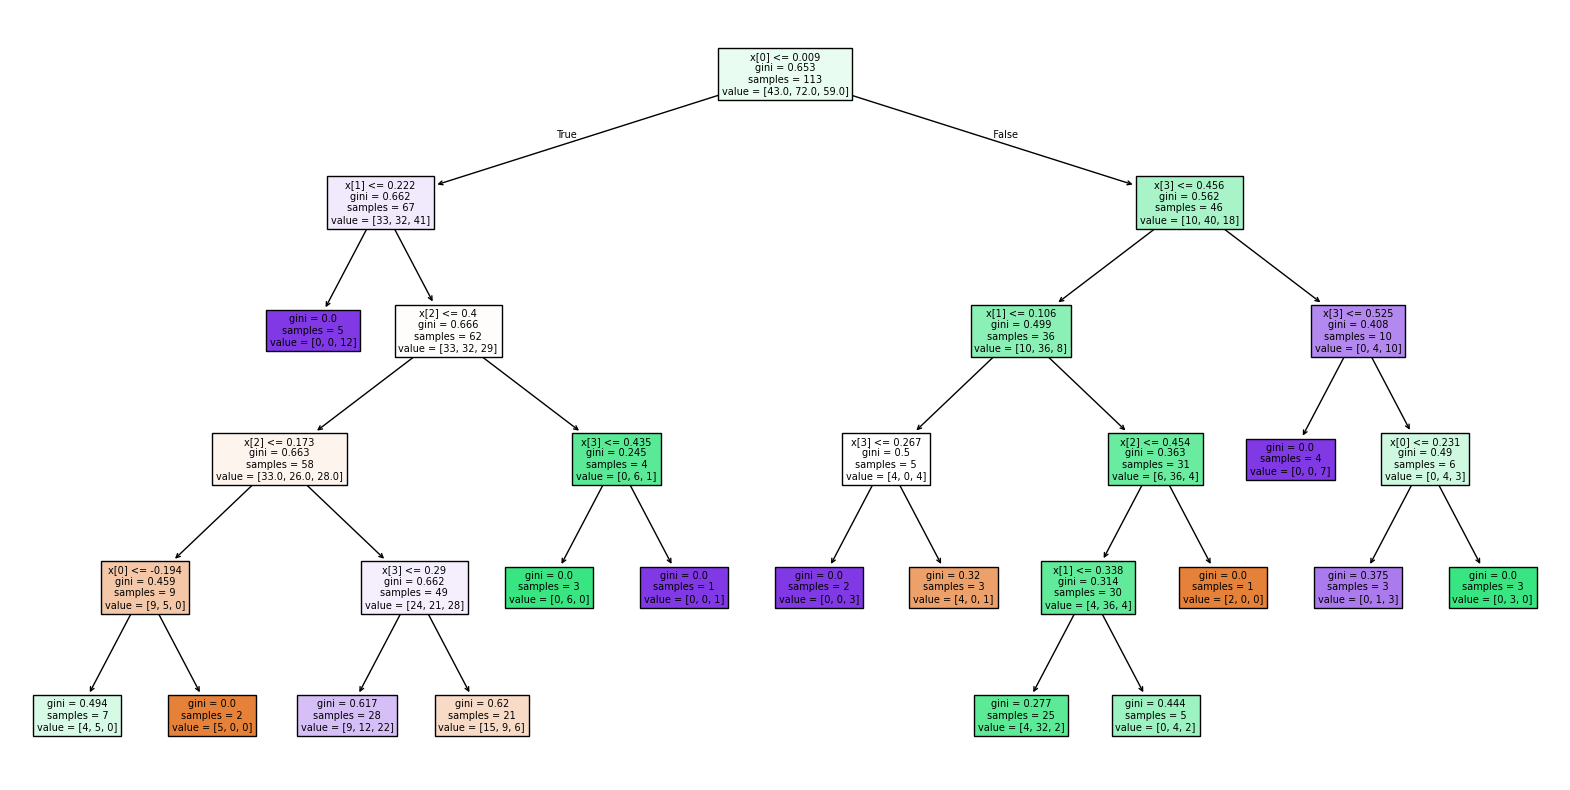

Accuracy:  0.7471264367816092
Précision:  0.7462226873836784
Recall:  0.7471264367816092
F1-score:  0.7334561396215695
Confusion Matrix:
 [[0.1091954  0.09195402 0.05172414]
 [0.01149425 0.36781609 0.02873563]
 [0.02873563 0.04022989 0.27011494]]

Accuracy:  0.3333333333333333
Précision:  0.30761904761904757
Recall:  0.3333333333333333
F1-score:  0.31611117518164
Confusion Matrix:
 [[0.01333333 0.10666667 0.13333333]
 [0.10666667 0.2        0.14666667]
 [0.01333333 0.16       0.12      ]]


In [27]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [28]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [  521.31763114   528.06250422  1049.38013536 -1573.10575974]
Intercept: 10.810739524189774
Mean squared error: 478.3804300590351
R² score: -0.025309791806948922
